<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
# %reset
#!pip install matplotlib
#!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import datetime
import time

#!pip install -U varname
from varname import argname
def prnow():
    print(datetime.datetime.now())
myDEBUG = True
df = pd.DataFrame()
def prdf(ldf):
    if myDEBUG == True:
        print('prdf says: type of ', argname('ldf'), ' is ', type(ldf))
        print(argname('ldf'), type(ldf))
        print(ldf.shape)
        print(ldf.columns)
        print(ldf.head(3))
prnow()

2024-11-03 07:52:11.614170


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [ ]:
'''
from pyodide.http import pyfetch
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())
''';


In [ ]:
#file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [ ]:
''';
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"
''';

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [2]:
myfile = 'm2_survey_data.csv'
fpfn = os.path.join(os.getcwd(), myfile)
df = pd.read_csv(fpfn)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [3]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
print(df.shape)
print(df.dtypes['ConvertedComp'])
print(df.dtypes[['Respondent', 'Age']])  # int16, float64

### Do this stuff to verify plots and do scaling as needed
dfcln = df.copy()
#dfcln = dfcln.truncate(after=20, axis=0)  # for testing
pd.options.display.float_format = '{:.2f}'.format

dfcln = dfcln.drop_duplicates(keep='last')
dfcln = dfcln.reset_index(drop=True)
dfcln.dropna(subset=["ConvertedComp","Age"], axis=0, inplace=True)  # but astype(int) still fails
dfcln = dfcln.reset_index()
#dfcln.dropna(axis=1, inplace=True)  # drops if *any* cells are na, i wanted *all* cells na
dfcln.dropna(axis=1, how='all',  inplace=True)
dfcln = dfcln.reset_index(drop=True)

dfcln = dfcln[(dfcln['ConvertedComp'] != 0 ) & (dfcln['Age'] != 0) ]
dfcln['ConvertedComp'] = round(dfcln['ConvertedComp'] , 2)

dfcln['Age'] = pd.to_numeric(dfcln['Age'], downcast='integer')  # doesn't work on this pandas/py version
print("type of Age ", type(dfcln['Age']))  # series
print(dfcln.dtypes['ConvertedComp'])  # float64
print('Median = ', dfcln['ConvertedComp'].median())  # 57744
print(dfcln['ConvertedComp'].describe())
#pd.reset_option('display.float_format')
print('Median Age = ', dfcln['Age'].median())  # 57744
print('Median Age = ', df['Age'].median())  # 57744
#print(dfcln.value_counts(dfcln[['Gender'] == 'Women']))  # no works in my versions
print(df.value_counts(['Gender']))  # Man is 9493 or 10480, women is 666 in dfcln or 731 in df


(11398, 85)
float64
Respondent      int64
Age           float64
dtype: object
type of Age  <class 'pandas.core.series.Series'>
float64
Median =  57744.0
count     10329.00
mean     131677.26
std      294263.20
min           4.00
25%       27255.00
50%       57744.00
75%      100000.00
max     2000000.00
Name: ConvertedComp, dtype: float64
Median Age =  29.0
Median Age =  29.0
Gender                                                     
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<Figure size 4000x1000 with 0 Axes>

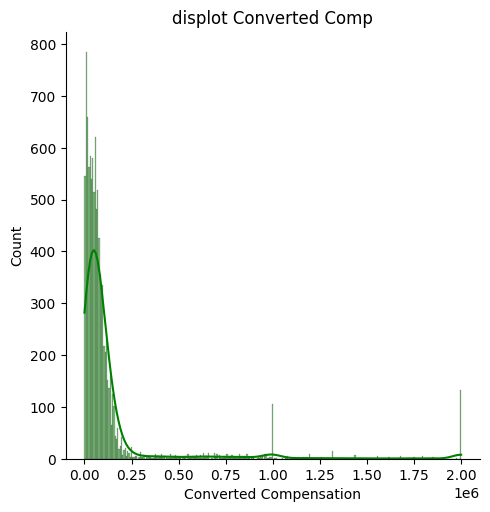

In [5]:
# your code goes here
width = 40
height = 10
plt.figure(figsize=(width, height))
sns.displot(dfcln, x='ConvertedComp', kde=True, color="g", label="Annual Compensation")
plt.title('displot Converted Comp')
plt.xlabel('Converted Compensation')
plt.show()


Plot the histogram for the column `ConvertedComp`.


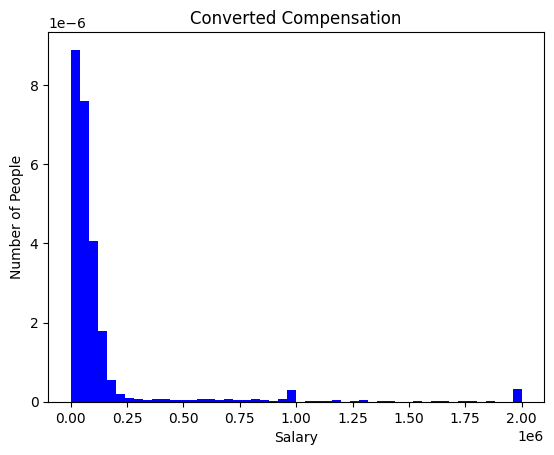

In [6]:
# your code goes here
# your code goes here
x = dfcln['ConvertedComp']
plt.hist(x, bins=50, density=True, alpha=1, color='b')
#mu, sigma = np.mean(data), np.std(data)
#y = np.linspace(min(data), max(data), 100)
#x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
#sns.displot(x, bins=50, color='blue')
plt.xlabel('Salary')
plt.ylabel('Number of People')
plt.title('Converted Compensation')
plt.show()


What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
print(dfcln['ConvertedComp'].median())


57744.0


How many responders identified themselves only as a **Man**?


In [8]:
# your code goes here
#print(dfcln.columns)
print(dfcln.value_counts(['Gender']))  # Man is 9493

Gender                                                     
Man                                                            9493
Woman                                                           666
Non-binary, genderqueer, or gender non-conforming                58
Man;Non-binary, genderqueer, or gender non-conforming            24
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: count, dtype: int64


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [24]:
# your code goes here
dfcln['Gender'] = dfcln['Gender'].astype(str)

Gnbr = dfcln.columns.get_loc('Gender')  # get the column number for Gender
CCnbr = dfcln.columns.get_loc('ConvertedComp') # get the column number for ConvertedComp
addlist = []
print(type(dfcln.shape[0]))  # int
for row in range(0, dfcln.shape[0]):
    #print('Gender=',df.iloc[row, Gnbr], ' CC=',df.iloc[row,CCnbr])
    if 'Woman' in dfcln.iloc[row, Gnbr]:  # value is a string, Gngr is an int
        # TypeError: argument of type 'float' is not iterable
        addlist.append(dfcln.iloc[row, CCnbr])
serccw = pd.Series(addlist)
print('Median of Gender identity including Woman is ', serccw.median())


<class 'int'>
Median of Gender identity including Woman is  57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# your code goes here
print(dfcln['Age'].describe() )


count   10329.00
mean       30.83
std         7.39
min        16.00
25%        25.00
50%        29.00
75%        35.00
max        99.00
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


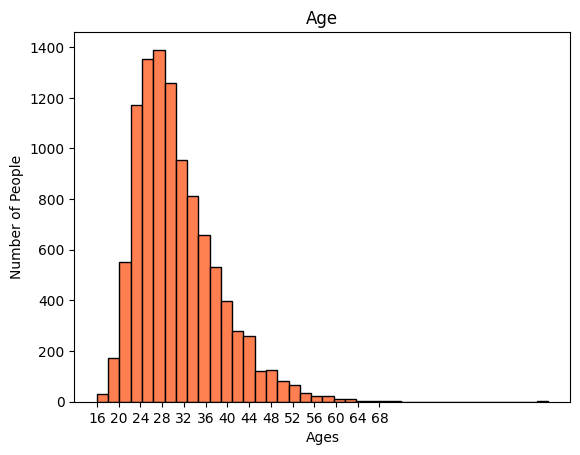

In [39]:
# your code goes here - somewhat copied from StackOverflow
data = dfcln['Age']

plt.hist(data, bins=40, density=False, alpha=1, 
         color='coral',edgecolor='black')
plt.xticks(np.arange(16,72,4))
plt.xlabel('Ages')
plt.ylabel('Number of People')
plt.title('Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


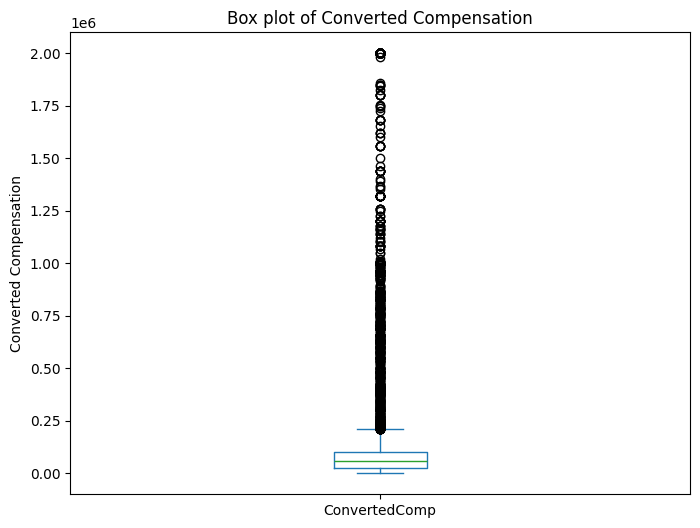

In [12]:
# your code goes here
dfclncc = dfcln['ConvertedComp'].to_frame()
dfclncc.plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Converted Compensation')
plt.ylabel('Converted Compensation')
#plt.yscale('log')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# your code goes here
#dfclncc = dfcln['ConvertedComp'].to_frame()
dfclncc = dfcln[['Respondent','ConvertedComp']]
dfclncc = dfclncc.set_index('Respondent')

dfquants = dfclncc.quantile([0.75, 0.25, 0.50], axis=0)
num75 = dfquants.iloc[0,0]
num25 = dfquants.iloc[1,0]
IQR = float(num75 - num25)
print('IQR for ConvertedComp is ', IQR)


IQR for ConvertedComp is  72745.0


Find out the upper and lower bounds.


In [14]:
# your code goes here
boundup = num75 + (1.5 * IQR)
bounddn = num25 - (1.5 * IQR)
print('upper and lower bounds are ', boundup, ' , ', bounddn)

upper and lower bounds are  209117.5  ,  -81862.5


Identify how many outliers are there in the `ConvertedComp` column.


In [16]:
# your code goes here
outlist = []
for id in range(0,dfclncc.shape[0]):
    #if dfclncc.iloc[id, 0] > IQR:  # know that Respondent is index and ConvertedCol is col # 0
    #now it is printing all of them
    tmpnum = float(dfclncc.iloc[id, 0])
    if (tmpnum < bounddn) or (tmpnum > boundup):
        #print('Respondent number ', id, ' is an outlier, ConvertedComp=',dfclncc.iloc[id, 0])
        outlist.append(dfclncc.iloc[id, :])  # add to the list
dfoutliers = pd.DataFrame(outlist)
print('Number of outliers is ', dfoutliers.shape[0])
prdf(dfoutliers)


Number of outliers is  862
prdf says: type of  dfoutliers  is  <class 'pandas.core.frame.DataFrame'>
dfoutliers <class 'pandas.core.frame.DataFrame'>
(862, 1)
Index(['ConvertedComp'], dtype='object')
     ConvertedComp
16       455352.00
32      1100000.00
100      229016.00


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


old shape is  (10329, 86)
new shape is  (9467, 86)  correct since 862 outliers and 10329 - 862 is 10329
Median is about 50000 thousand after removing outliers


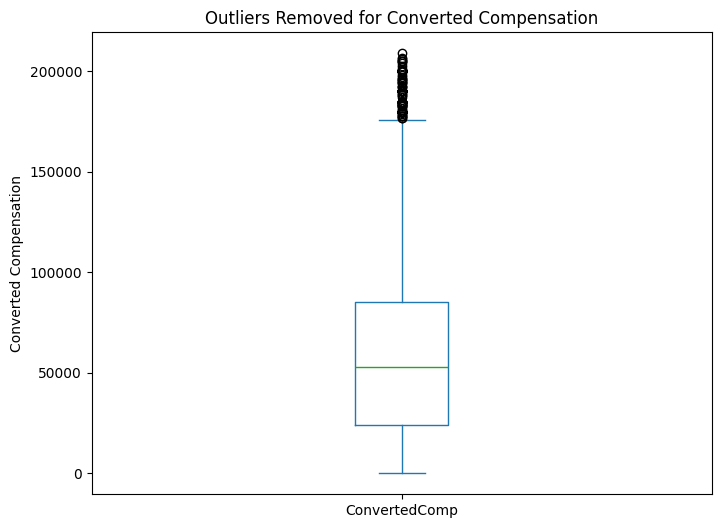

In [24]:
# your code goes here
#dfnew = dfcln.drop(dfcln[dfcln['ConvertedComp'] > boundup])  # key error
dfnew = dfcln[dfcln['ConvertedComp'] <= boundup]
print('old shape is ', dfcln.shape)
print('new shape is ', dfnew.shape, ' correct since 862 outliers and 10329 - 862 is 10329')
# Try a new box plot)  
# correct because # of outliers is 862 and 10329 - 862 is 10329
# Try a new box plot
dfnew['ConvertedComp'].plot(kind='box', figsize=(8, 6))
print('Median is about 50000 thousand after removing outliers')
plt.title('Outliers Removed for Converted Compensation')
plt.ylabel('Converted Compensation')
plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


     Age
Age 1.00
Index(['index', 'Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs',
       'CodeRevHrs', 'Age'],
      dtype='object')
     Age
Age 1.00


<Figure size 1500x1000 with 0 Axes>

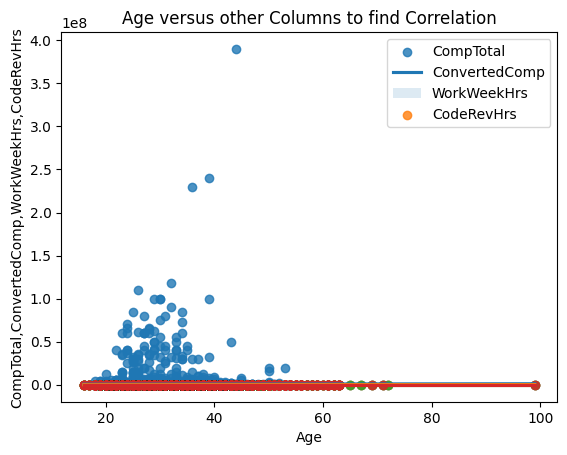

There are good correlations for all except CompTotal


In [31]:
# your code goes here
print(dfnew[['Age']].corr() )  # 1.0
print(dfnew._get_numeric_data().columns)  # 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs', 'Age'
dfnum = dfnew._get_numeric_data()
#dfnum.set_index('Age')
print(dfnew[['Age']].corr() )  # 1.0

ycolumns = ['CompTotal','ConvertedComp','WorkWeekHrs','CodeRevHrs']
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots()
for y in ycolumns:
    sns.regplot(x='Age', y=y, data=dfnew)
plt.xlabel('Age')
plt.ylabel('CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs')
plt.title('Age versus other Columns to find Correlation')
plt.legend(ycolumns, loc='upper right')
plt.show()
print('There are good correlations for all except CompTotal')


<Figure size 4000x1000 with 0 Axes>

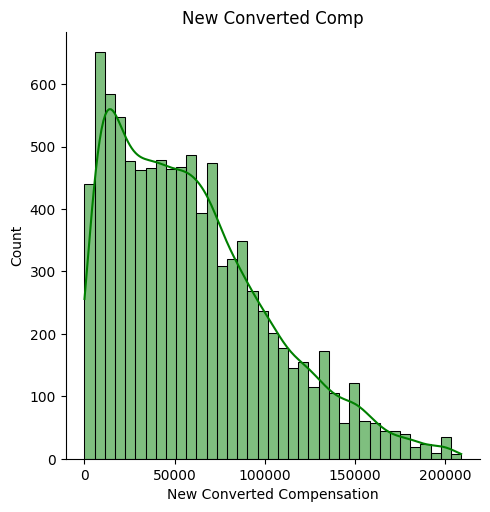

In [32]:
# Try a new distribution plot
# your code goes here
width = 40
height = 10
plt.figure(figsize=(width, height))
sns.displot(dfnew, x="ConvertedComp", kde=True, color="g", label="Annual Compensation, Outliers Removed")
plt.title('New Converted Comp')
plt.xlabel('New Converted Compensation')
plt.show()



## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
